In [106]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge")),
                   ])

svm_clf.fit(X, y)
#clf = LinearSVC(C=1, loss="hinge", random_state=42, dual="auto", max_iter=10000).fit(X, y)  ## trying to fit directly without scaling will produce some warnings about a convergence issue. We need to center the training set first by substracting its mean.

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [107]:
svm_clf.predict([[5.0, 1.5]])

array([0.])

In [108]:
#clf = svm_clf.steps[1][1]  ## we can extract the step from the pipeline like this
decision_function = svm_clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

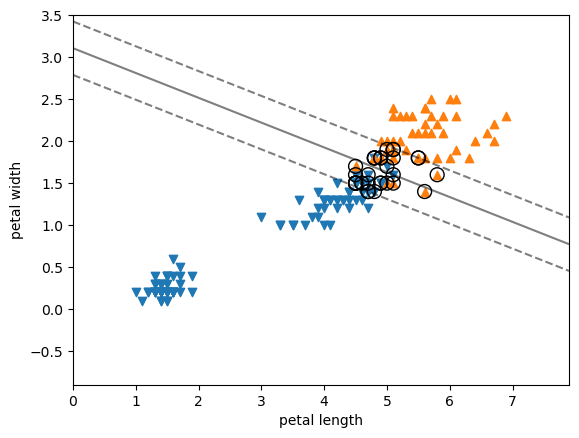

In [109]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

type0_x, type0_y = X[:,0][y == 0], X[:,1][y == 0]
type1_x, type1_y = X[:,0][y == 1], X[:,1][y == 1]

plt.scatter(type0_x, type0_y, marker="v")
plt.scatter(type1_x, type1_y, marker="^")
plt.xlabel('petal length')
plt.ylabel('petal width')

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svm_clf,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)

plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)